In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('mymoviedb.csv', engine='python')
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [11]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [13]:
df.duplicated().sum()

0

In [15]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [17]:
# Attempt to convert 'Release_Date' to datetime, invalid values will be set as NaT
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Check the dtype of the 'Release_Date' column after conversion
print(df['Release_Date'].dtypes)


datetime64[ns]


In [19]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
print(df['Release_Date'].dtypes)
print(df[df['Release_Date'].isna()])
df['Release_Date'] = df['Release_Date'].dt.year
print(df['Release_Date'].dtypes)  # Should print 'int64'


datetime64[ns]
     Release_Date   Title Overview  Popularity Vote_Count Vote_Average  \
1106          NaT    None     None         NaN       None         None   
1107          NaT    None     None         NaN       None         None   
1108          NaT    None     None         NaN       None         None   
1109          NaT    None     None         NaN       None         None   
1110          NaT    None     None         NaN       None         None   
1111          NaT    None     None         NaN       None         None   
1112          NaT    None     None         NaN       None         None   
1113          NaT    None     None         NaN       None         None   
1114          NaT    None     None         NaN       None         None   
1115          NaT  61.328       35         7.1         en    Animation   

                                      Original_Language Genre Poster_Url  
1106                                               None  None       None  
1107                

In [21]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021.0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022.0,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022.0,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021.0,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021.0,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [23]:
cols = ['Overview','Original_Language','Poster_Url']

In [25]:
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [27]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,6.3,Thriller
3,2021.0,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


**categorizing `Vote_Average` column**

we would cut the `Vote_Average` values and make 4 categories: `popular` `average` `below-avg` `not_popular` to describe it more using catigorize_col() function provided above.


In [34]:
import pandas as pd

def categorize_vote_average(df, col):
    labels = ['non_popular', 'below_average', 'average', 'popular']
    
    # Ensure the column is numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Get statistical edges
    stats = df[col].describe()  # Computes min, 25%, 50%, 75%, max
    edges = [stats['min'], stats['25%'], stats['50%'], stats['75%'], stats['max']]
    
    # Replace the existing column with categorical values
    df[col] = pd.cut(df[col], bins=edges, labels=labels, duplicates='drop', include_lowest=True)
    
    return df

# Example usage
df = categorize_vote_average(df, 'Vote_Average')
print(df.head())  # Display the updated dataframe


   Release_Date                    Title  Popularity Vote_Count  \
0        2021.0  Spider-Man: No Way Home    5083.954       8940   
1        2022.0               The Batman    3827.658       1151   
2        2022.0                  No Exit    2618.087        122   
3        2021.0                  Encanto    2402.201       5076   
4        2021.0           The King's Man    1895.511       1793   

    Vote_Average                               Genre  
0        popular  Action, Adventure, Science Fiction  
1        popular            Crime, Mystery, Thriller  
2  below_average                            Thriller  
3        popular  Animation, Comedy, Family, Fantasy  
4        average    Action, Adventure, Thriller, War  


In [36]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,below_average,Thriller
3,2021.0,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [42]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,below_average,Thriller
3,2021.0,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [44]:
#DONE HA OKK So can i leave ok thank you welcome chal bye hm bye  

In [46]:
df['Vote_Average'].value_counts()


Vote_Average
non_popular      2567
popular          2450
average          2411
below_average    2398
Name: count, dtype: int64

In [48]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [50]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,below_average,Thriller
3,2021.0,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [52]:
df['Genre'] =df['Genre'].str.split(', ')

df =df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151,popular,Crime
4,2022.0,The Batman,3827.658,1151,popular,Mystery


In [54]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [56]:
# Ensure Genre is a string before splitting
df['Genre'] = df['Genre'].astype(str).str.split(', ')

# Explode the dataframe to have one genre per row
df = df.explode('Genre')

# Remove rows where 'Genre' is 'nan' (converted from NaN)
df = df[df['Genre'] != 'nan'].reset_index(drop=True)

# Display the updated dataframe
df.head(5)


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151,popular,Crime
4,2022.0,The Batman,3827.658,1151,popular,Mystery


In [58]:
print(df["Genre"].unique())  # See unique values in Genre column
print(df["Genre"].isna().sum())  # Count NaN values


['Action' 'Adventure' 'Science Fiction' 'Crime' 'Mystery' 'Thriller'
 'Animation' 'Comedy' 'Family' 'Fantasy' 'War' 'Horror' 'Drama' 'Music'
 'Romance' 'Western' 'History' 'TV Movie' 'Documentary']
0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25792 non-null  float64 
 1   Title         25792 non-null  object  
 2   Popularity    25792 non-null  float64 
 3   Vote_Count    25792 non-null  object  
 4   Vote_Average  25792 non-null  category
 5   Genre         25792 non-null  object  
dtypes: category(1), float64(2), object(3)
memory usage: 1.0+ MB


In [62]:
df.nunique()

Release_Date     102
Title           9512
Popularity      8159
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

In [64]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151,popular,Crime
4,2022.0,The Batman,3827.658,1151,popular,Mystery


# Data visualization

In [67]:
sns.set_style('whitegrid')

# what is the most frequent genre of movie released on Netflix?

In [70]:
df['Genre'].describe()

count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

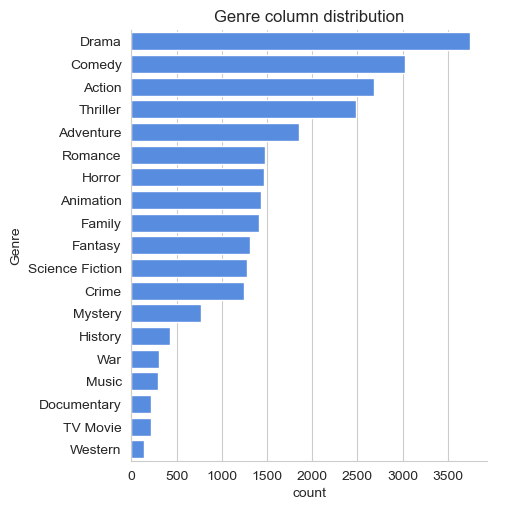

In [72]:
sns.catplot(y= 'Genre',data = df,kind = 'count',
            order = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title('Genre column distribution')
plt.show()

# Which has highest votes in vote avg column?

In [75]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151,popular,Crime
4,2022.0,The Batman,3827.658,1151,popular,Mystery


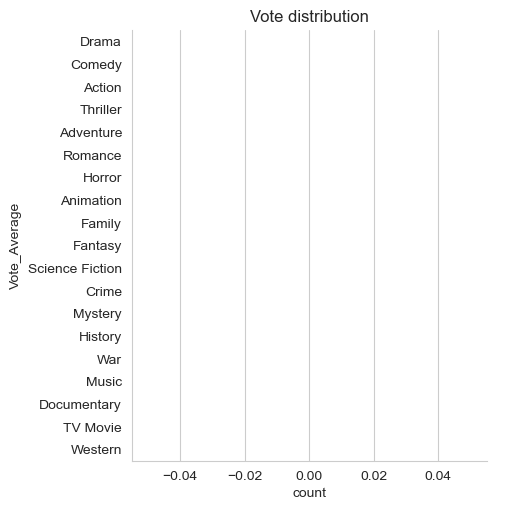

In [80]:
sns.catplot(y='Vote_Average', data = df, kind = 'count',
            order= df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title('Vote distribution')
plt.show()

# What movie got the highest popularity? what's its genre?

In [83]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [85]:
df[df['Popularity']== df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25786,2021.0,The United States vs. Billie Holiday,13.354,152,average,Music
25787,2021.0,The United States vs. Billie Holiday,13.354,152,average,Drama
25788,2021.0,The United States vs. Billie Holiday,13.354,152,average,History
25789,1984.0,Threads,13.354,186,popular,War
25790,1984.0,Threads,13.354,186,popular,Drama
25791,1984.0,Threads,13.354,186,popular,Science Fiction


# Which year has the most filmmed movies?

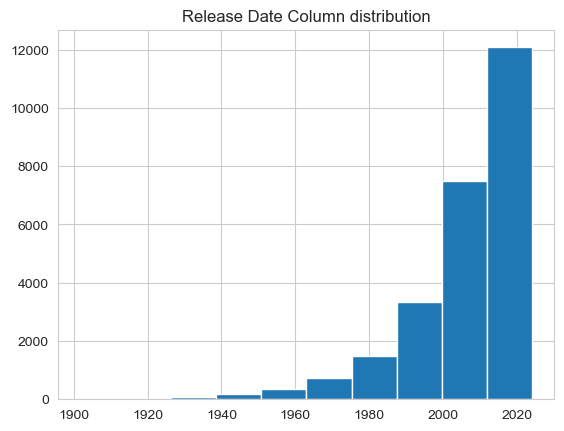

In [94]:
df['Release_Date'].hist()
plt.title('Release Date Column distribution')
plt.show()

#conclusion 
Q1. what is the most frequent genre in  the dataset?
ans:Drama genre is the most frequent genre in our dataset and has appered more than 14% of the times among 19 other genres.

Q2. what genre has highest votes?
ans: we have 25.5% of our dataset with popular vote(6520 rows). draw again gets the highest popularity among fans by beign having more than 18.5% movies popularities. 

Q3.What movie got the lowest popularity? whats its genre?
ans: The united states, thread has the highest lowest rate in our dataset and it has genre of music, drama,'war','sci-fi' and history`.

Q4.Which year has the most filmmed movies?
ans:year 2020 has the highest filmming rate in our dataset.